# Examples for using wkb_fast_zerobeta.py

## Import block

First we are going to discuss importing the module to our script, *since there is a slightly non-standard complication*.

First off, if the script we are running is in a directory below the main directory (the directory in which `wkb_fast_zerobeta.py` and others are kept) we need to let the python kernel know where that is, then we import it under the alias `wkb`.

In [1]:
# Path relative to main directory                                                                                                                     
import sys 
sys.path.append('../')

If we now try to import the module, we would get an error (you can comment out the next cell and run to see for yourself, but it is commented as default because otherwise it interferes with "Run All" in the notebook)

In [2]:
#import wkb_fast_zerobeta as wkb 

This is because the module requires foreknowledge of the class of magnetic field you want to use (from `magnetic_field.py`). To avoid having to edit `wkb_fast_zerobeta.py` every time we want to use a different field, (and to keep scripts relating to different problems self-contained) we import the class at runtime.

This is done by the module, when first imported, immediately looks for a module called tmp_config.py which tells it desired class. The above error occurs if this file does not exist.

A (the?) way you can initialise your splotting script / interactive session / whatever is with the following

In [3]:
# Create a tmp file to pass the chosen field class to wkb class
f = open('tmp_config.py','w')
f.write('fieldclass=\'Linear2dNull\'')
f.close()

This tells it to use the `Linear2dNull` fieldclass (it must be one of the classes defined in `magnetic_field.py`). Now importing the module shouldn't throw an error

In [4]:
import wkb_fast_zerobeta as wkb 

Generally, we should always clean up the temporary file once its no longer needed (in case it interferes with anything else).

In [5]:
# Remove the f
import os
os.remove('tmp_config.py')
from magnetic_field import Linear2dNull as magnetic_field

So overall, our initial block might be something like

In [6]:
# Path relative to main directory                                                                                                                     
import sys 
sys.path.append('../')
# Create a tmp file to pass the chosen field class to wkb class
f = open('tmp_config.py','w')
f.write('fieldclass=\'Linear2dNull\'')
f.close()
# Import
import matplotlib.pyplot as plt 
import wkb_fast_zerobeta as wkb 
import numpy as np
import math
# Remove the f
import os
os.remove('tmp_config.py')
from magnetic_field import Linear2dNull as magnetic_field


where we've also imported `matplotlib` and `numpy`.

## Plotting a field 

This shows an example of how to plot a 2D magnetic field through drawing contours of its flux function. You can also trace magnetic fieldlines directly (this will be shown in a later example).

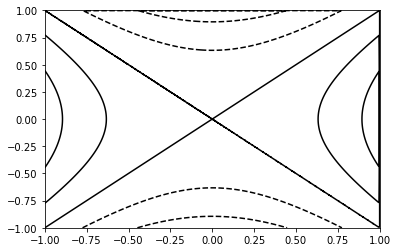

In [7]:
# Plot fieldlines as contours of the flux functon
nx = 512 
ny = 512 
gx = np.linspace(-1.0,1.0,nx)
gy = np.linspace(-1.0,1.0,ny)
 
az = np.zeros([nx,ny])
 
for iy in range(0,ny-1):
    for ix in range(0,nx-1):
        b = magnetic_field(gx[ix],gy[iy],0.0)
        az[ix,iy] = b.az
 
plt.contour(gx,gy,az,4,colors='black')
plt.show()

## Tracing a single ray path

We can consider a single ray path easily. Ray solutions are stored and manipulated via the ray class.

We first give it some initial values and call the class *initialiser*

In [8]:
# Some testing stuff 
x0 = 0
y0 = 1.0
z0 = 0.0
p = 1.0 
q = 0.1 
r = 0.0
myray = wkb.Ray(x0, y0, z0, p, q, r)


we now can use one of the Ray class methods, `solve`, to calculate the trajectory to an end time, and then use `matplotlib` to plot it.

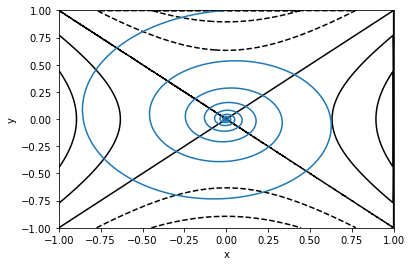

In [9]:
ns = 1000 
t_end = 300  
s_end = t_end / 2.0 / math.pi  
myray.solve(s_end,ns)
 
    
plt.contour(gx,gy,az,4,colors='black') # it seems necessary to repeat this in Jupyter after a plt.show()?
plt.plot(myray.x,myray.y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-1,1,-1,1])
plt.show()


We note that the choice of `ns=1000` returns the solution at 1000 *sample points*. The ode solver automatically chooses step sizes within tolerances. This can give the impression of larger 'jumps' in regions of high alfven speed than in regions of slower procession. In reality, it is just that the linear sampling in time means there are less points to construct the line. The ode solution itself usually has used an appropriate step size within adaptive tolerances. Beware of this.

## Handling many rays

There is also a class that consists of a list of rays that contains additional methods for initialising and solving groups of individual rays *en masse*. These are called Swarms. There are a variety of `init_` methods for initialising groups (for example, along a straight line, in a plane, in a circle), and then each swarm can be solved much like the rays themselves (call `.solve()`



Solved 40 rays in 0.027872085571289062 seconds
Solved 40 rays in 0.02809739112854004 seconds


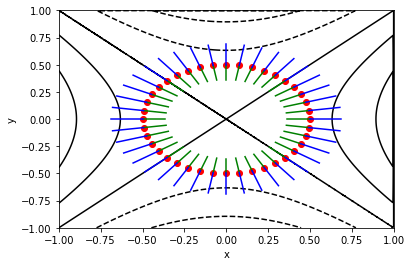

In [10]:
# Some testing stuff 
x0 = 0.
y0 = 0.
z0 = 0.
d = 0.5 # radius
nrays =40 
dphi_dr = 1.0 
t_end = 2.  
s_end = t_end / 2.0 / math.pi  
ns = 100 
 
swarm1 = wkb.Swarm.init_circle_zplane(x0,y0,z0,d,nrays,dphi_dr)
swarm2 = wkb.Swarm.init_circle_zplane(x0,y0,z0,d,nrays,dphi_dr)

plt.contour(gx,gy,az,4,colors='black') # it seems necessary to repeat this in Jupyter after a plt.show()?

# Plot the initial points
for myray in swarm1.rays:
    plt.plot(myray.x,myray.y,'ro')
 
# Solve forwards and backwards trajectories

swarm1.solve(s_end,ns)
for myray in swarm1.rays:
    plt.plot(myray.x,myray.y,'g')
 
swarm2 = wkb.Swarm.init_circle_zplane(x0,y0,z0,d,nrays,-dphi_dr)
swarm2.solve(s_end,ns)
for myray in swarm2.rays:
    plt.plot(myray.x,myray.y,'b')
 
 
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-1,1,-1,1])
#plt.savefig('test.png')
plt.show()
